<a href="https://colab.research.google.com/github/Mason0416/Decision-Tree/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("9946_stock_price.csv")  # or Excel file
# columns: 開盤價, 交易量

In [10]:
print(df)

      證券代碼         年月日  開盤價(元)  最高價(元)  最低價(元)  收盤價(元)   成交量(千股)     成交值(千元)  \
0     9946  2008-01-02   14.75   14.75   14.50   14.50     2.050      29.955   
1     9946  2008-01-03   13.70   14.35   13.70   14.10    11.150     155.205   
2     9946  2008-01-04   13.50   14.00   13.50   14.00    29.000     394.750   
3     9946  2008-01-07   13.10   13.85   13.10   13.85    17.000     227.950   
4     9946  2008-01-08   13.30   13.50   13.00   13.40    21.000     277.850   
...    ...         ...     ...     ...     ...     ...       ...         ...   
4034  9946  2024-05-29   43.60   44.85   42.80   44.30  2752.912  120880.442   
4035  9946  2024-05-30   44.35   45.00   43.85   44.35  1785.251   79339.322   
4036  9946  2024-05-31   44.40   45.90   44.20   45.00  2362.383  106583.403   
4037  9946  2024-06-03   45.25   48.50   43.70   48.20  4206.403  196446.103   
4038  9946  2024-06-04   48.20   48.20   46.20   47.00  3301.448  155583.542   

        報酬率％    週轉率％  ...   現金股利率  股價漲跌

In [11]:
X = df[['開盤價(元)', '成交量(千股)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_filtered = X[X['成交量(千股)'] <= 6000].copy()

X = df_filtered[['開盤價(元)', '成交量(千股)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_filtered['cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from font(s) DejaVu Sans.
  fig.canvas

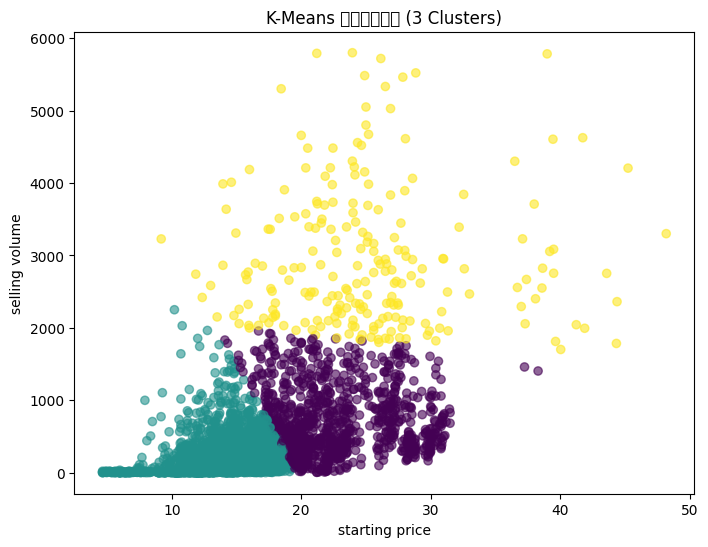

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_filtered['開盤價(元)'], df_filtered['成交量(千股)'],
            c=df_filtered['cluster'], cmap='viridis', alpha=0.6)

plt.xlabel('starting price')
plt.ylabel('selling volume')
plt.title('K-Means 分成三群結果 (3 Clusters)')
plt.show()

In [14]:
df_filtered['cluster'] = df_filtered['cluster'].replace({
    0: '高價低量',
    1: '低價高量',
    2: '中價中量'
})
print(df_filtered)

      開盤價(元)   成交量(千股) cluster
0      14.75     2.050    低價高量
1      13.70    11.150    低價高量
2      13.50    29.000    低價高量
3      13.10    17.000    低價高量
4      13.30    21.000    低價高量
...      ...       ...     ...
4034   43.60  2752.912    中價中量
4035   44.35  1785.251    中價中量
4036   44.40  2362.383    中價中量
4037   45.25  4206.403    中價中量
4038   48.20  3301.448    中價中量

[4027 rows x 3 columns]
